## Machine Learning


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\SURENDER SINGH\Documents\Used_Bikes.csv")
df


,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [4]:
## Removing duplicacy and null data set
df.duplicated().sum()
df=df.dropna()
df=df.drop_duplicates()

In [5]:
## data divide into numeric and categorical
numerical = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(include="O")

In [6]:
## feature selection -- 

categorical= categorical.drop(["bike_name","city"],axis=1)


In [7]:
categorical

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha
...,...,...
9362,First Owner,Hero
9369,First Owner,Bajaj
9370,First Owner,Harley-Davidson
9371,First Owner,Bajaj


In [8]:
numerical.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [9]:
## encoding --  char -- num
 # 1. label encoding
 # 2. 

## one hot encoding 
# pd.get_dummies(categorical).astype(int).head()

In [10]:
categorical["owner"].value_counts()

owner
First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: count, dtype: int64

In [11]:
dt = {
    "First Owner" :1,
    "Second Owner" :2,
    "Third Owner" :3,
    "Fourth Owner Or More" :4
}

In [12]:
categorical["owner"] = categorical["owner"].map(dt)

In [13]:
categorical

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha
...,...,...
9362,1,Hero
9369,1,Bajaj
9370,1,Harley-Davidson
9371,1,Bajaj


In [14]:
brand_dict ={i : key for key , i in enumerate(list(categorical["brand"].unique()))}


In [15]:
categorical["brand"] = categorical["brand"].map(brand_dict)

In [16]:
print(brand_dict)
categorical

{'TVS': 0, 'Royal Enfield': 1, 'Triumph': 2, 'Yamaha': 3, 'Honda': 4, 'Hero': 5, 'Bajaj': 6, 'Suzuki': 7, 'Benelli': 8, 'KTM': 9, 'Mahindra': 10, 'Kawasaki': 11, 'Ducati': 12, 'Hyosung': 13, 'Harley-Davidson': 14, 'Jawa': 15, 'BMW': 16, 'Indian': 17, 'Rajdoot': 18, 'LML': 19, 'Yezdi': 20, 'MV': 21, 'Ideal': 22}


,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3
...,...,...
9362,1,5
9369,1,6
9370,1,14
9371,1,6


In [17]:
## concat 
final_df = pd.concat([numerical,categorical],axis=1)


In [18]:
final_df

,price,kms_driven,age,power,owner,brand
0,35000.0,17654.0,3.0,110.0,1,0
1,119900.0,11000.0,4.0,350.0,1,1
2,600000.0,110.0,8.0,675.0,1,2
3,65000.0,16329.0,4.0,180.0,1,0
4,80000.0,10000.0,3.0,150.0,1,3
...,...,...,...,...,...,...
9362,25000.0,48587.0,8.0,150.0,1,5
9369,35000.0,60000.0,9.0,220.0,1,6
9370,450000.0,3430.0,4.0,750.0,1,14
9371,139000.0,21300.0,4.0,400.0,1,6


In [19]:
metrix = final_df.corr()

In [20]:
metrix

,price,kms_driven,age,power,owner,brand
price,1.000000,-0.199951,-0.248752,0.807641,-0.005188,0.288409
kms_driven,-0.199951,1.000000,0.367518,-0.168295,0.062612,-0.036161
age,-0.248752,0.367518,1.000000,-0.164211,0.203151,-0.030263
power,0.807641,-0.168295,-0.164211,1.000000,0.043746,0.068647
owner,-0.005188,0.062612,0.203151,0.043746,1.000000,0.005844
brand,0.288409,-0.036161,-0.030263,0.068647,0.005844,1.000000


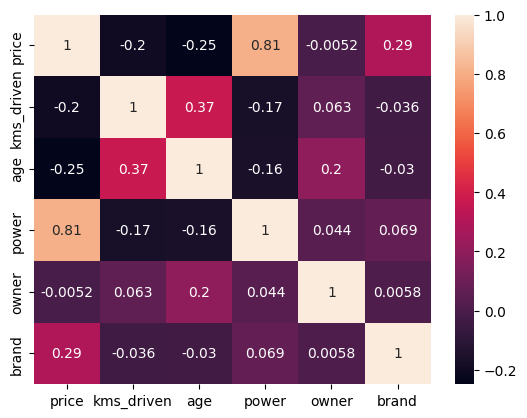

In [21]:
sns.heatmap(metrix,annot=True)
plt.show()

In [22]:
# Dividing data into dependent and independent variables
y = final_df["price"]
x = final_df.drop("price",axis=1)

In [23]:
y

0        35000.0
1       119900.0
2       600000.0
3        65000.0
4        80000.0
          ...   
9362     25000.0
9369     35000.0
9370    450000.0
9371    139000.0
9372     80000.0
Name: price, Length: 7324, dtype: float64

In [24]:
x

,kms_driven,age,power,owner,brand
0,17654.0,3.0,110.0,1,0
1,11000.0,4.0,350.0,1,1
2,110.0,8.0,675.0,1,2
3,16329.0,4.0,180.0,1,0
4,10000.0,3.0,150.0,1,3
...,...,...,...,...,...
9362,48587.0,8.0,150.0,1,5
9369,60000.0,9.0,220.0,1,6
9370,3430.0,4.0,750.0,1,14
9371,21300.0,4.0,400.0,1,6


In [25]:
## sc

   # pip install scikit-learn

In [26]:
## train and testing 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)
random_state=42

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
model.score(x_test,y_test)

0.7016180920706141

In [29]:
y_pred = model.predict(x_test)
y_pred

array([ 67314.744831  , 748464.71506025,  29651.96040171, ...,
        48703.10727352, 206047.8529031 ,  54783.28395216], shape=(1465,))

In [30]:
df1 = pd.DataFrame({"actual":y_test,"Predicted":y_pred})
df1

,actual,Predicted
8808,50000.0,67314.744831
2122,865000.0,748464.715060
1857,47000.0,29651.960402
1305,78000.0,41487.625437
8979,70000.0,61858.265214
...,...,...
7619,22000.0,23407.051092
6475,10000.0,21207.281067
4755,17000.0,48703.107274
8015,103000.0,206047.852903


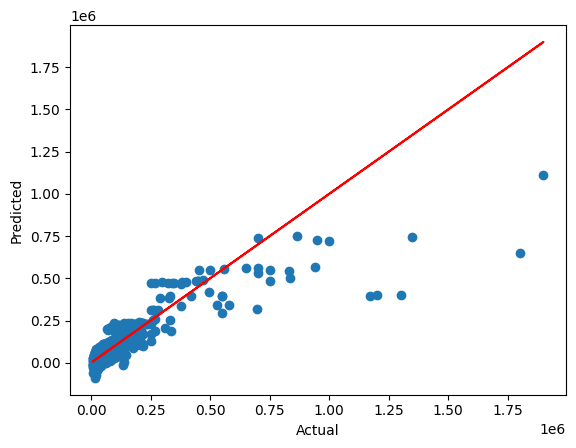

In [31]:
## plot the best fit line 
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot(y_test,y_test,color="Red")
plt.show()